# 회귀 둘러보기

연속된 값 하나를 예측하는 것을 회귀 Regression 예측이라 한다.

## 최근접 이웃 회귀
농어 perch의 **길이**가 특성이고 **무게**가 타깃이 된다.

<img src="https://d.pr/i/JvhJwh+" alt="Perch" width="300px">


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
perch_length = np.array([ # 문제
    8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
    21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
    22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
    27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
    36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
    40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([ # 답
    5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
    1000.0, 1000.0])

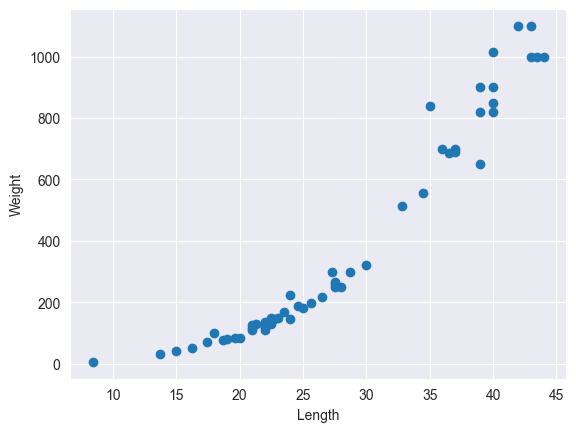

In [71]:
# 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [72]:
# 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)


# 모델 학습을 위해 2차원으로 변경
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
# -1 = 행(row) 개수를 자동으로 맞춰달라
# 1 = 열(column) 개수를 1로 만들어라


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42, 1) (42,)
(14, 1) (14,)


In [73]:
# 모델 학습
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### 결정 계수 ($R^2$)

$$
R^2 = 1 − \frac{\sum\limits_{i=1}^{n}(y_i−\hat{y_i})^2}{\sum\limits_{i=1}^{n}(y_i−\bar{y_i})^2}
$$

* $y\_i$는 실제 값이다.

* $\hat{y\_`i}$는 모델이 예측한 값이다.

* $\bar{y\_i}$는 실제 값의 평균이다.

* $\sum\limits\_{i=1}^{n}(y\_i−\hat{y\_i})^2$는 \*\*잔차 제곱합(Sum of Squares of Residuals, SSR)\*\*이라 하며, 모델이 예측한 값과 실제 값 사이의 차이를 나타낸다.

* $\sum\limits\_{i=1}^{n}(y\_i−\bar{y\_i})^2$는 \*\*총 변동합(Total Sum of Squares, SST)\*\*이라 하며, 실제 값의 평균에 대한 변동성을 나타낸다.

---

### $R^2$의 특징

* **범위**: $R^2$ 값은 일반적으로 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 잘 설명한다는 것을 의미한다. 그러나 일부 모델에서는 음수 값을 가질 수도 있다.

* **높은 $R^2$ 값의 의미**: 높은 $R^2$ 값은 회귀 모델이 독립 변수들을 사용하여 종속 변수의 변동을 잘 설명하고 있다는 것을 나타낸다. 이는 모델이 좋은 피팅을 제공하고 있다는 것을 의미한다.

* **낮은 $R^2$ 값의 의미**: 낮은 $R^2$ 값은 모델이 데이터를 잘 설명하지 못하고 있다는 것을 의미한다. 이는 모델이 중요한 패턴이나 변수들을 놓치고 있다는 것을 시사한다.

In [74]:
# 회귀 평가
# - 예측값이 정확한가?
# - R^2 결정계수 평가 : 1에 가까울수록 예측 성능이 좋다. 0이나 음수는 예측 성능이 나쁘다.

print('학습셋 : ', knn_reg.score(X_train, y_train))
print('평가셋 : ', knn_reg.score(X_test, y_test))

학습셋 :  0.9698823289099254
평가셋 :  0.992809406101064


In [75]:
# 회귀 예측
print(X_test[:3]) # 길이값
print(knn_reg.predict(X_test[:3])) # 예측
print(y_test[:3]) # 정답

[[ 8.4]
 [18. ]
 [27.5]]
[ 60.   79.6 248. ]
[  5.9 100.  250. ]


In [76]:
# R^2 직접 계산
pred = knn_reg.predict(X_test)
r_squared = 1 - (np.sum((y_test - pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
r_squared

np.float64(0.992809406101064)

### 최적의 최근접 이웃 개수 찾기

(40, 1)


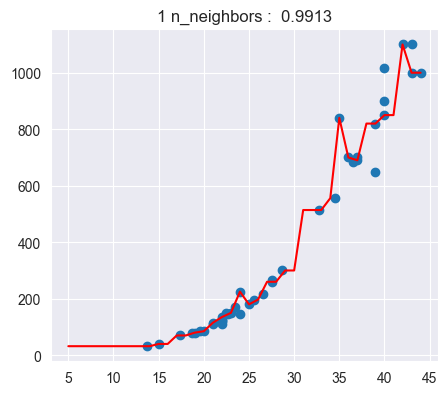

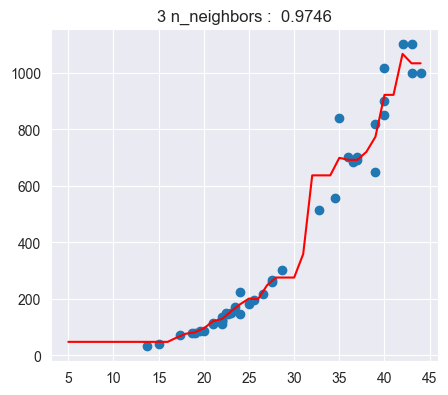

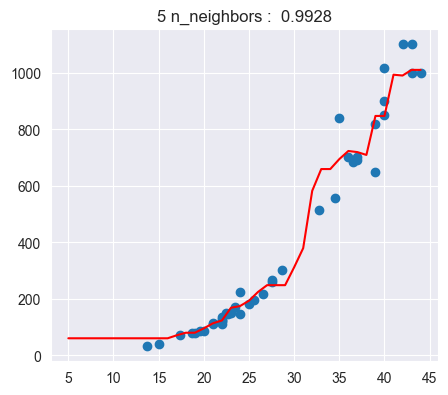

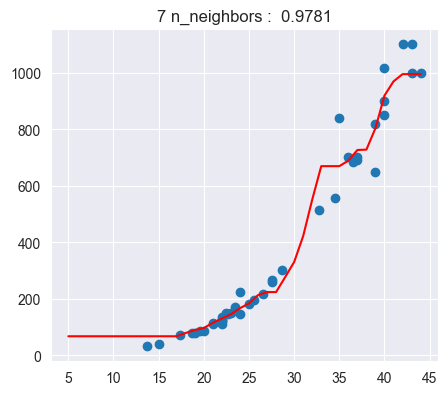

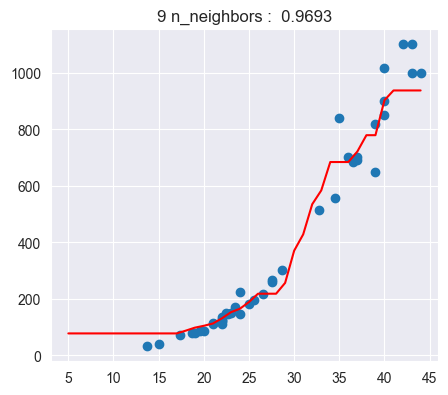

In [77]:
n_neighbors = [1, 3, 5, 7, 9]

# 예측선용 X 좌표
x = np.arange(5, 45).reshape(-1, 1) # 5부터 45미만까지 정수 생성
print(x.shape) # (40, 1)


for i, n in enumerate(n_neighbors):
    plt.figure(figsize=(5, 25))
    knn_reg = KNeighborsRegressor(n_neighbors=n)

    # 학습
    knn_reg.fit(X_train, y_train)

    # 평가
    r_squared = knn_reg.score(X_test, y_test)


    # print(f'{n} : {r_squared : .4f}')


    # plt.subplot() : 하나씩 축을 현재 figure에 추가
    plt.subplot(5, 1, i+1) # (행, 열, 몇 번째 칸)
    plt.scatter(X_train, y_train)
    plt.plot(x, knn_reg.predict(x), color='red')
    plt.title(f'{n} n_neighbors : {r_squared : .4f}')
    plt.show()




### 최근접이웃 모델의 한계

In [78]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
pred = knn_reg.predict([[50], [70], [100]]) # 배치 차원 # 여러개의 데이터를 묶어서 보낼때!!
pred

array([1010., 1010., 1010.])

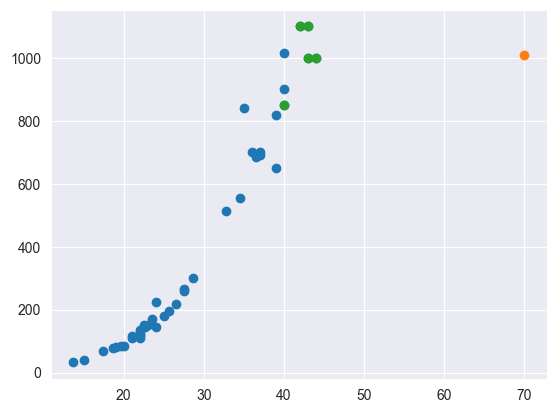

In [79]:
plt.scatter(X_train, y_train)
plt.scatter(70, 1010)

# 이웃 조회
distances, index = knn_reg.kneighbors([[70]])
plt.scatter(X_train[index], y_train[index])
# 메모리에 올라가 있는 데이터가 전부이기 때문에 데이터가 확실하지 않아도 그냥 가까운 이웃을 탐지하는 것이 한계점이다.
plt.show()

## 선형 회귀


**`sklearn.linear_model.LinearRegression`**


1. **`coef_` (회귀 계수)**:
   - `coef_`는 학습된 선형 회귀 모델의 각 특성(feature)에 대한 가중치(weight) 또는 회귀 계수(coefficient)이다.
   - 선형 회귀 모델의 방정식은 다음과 같은 형태로 표현된다:


   $$
   y = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b
   $$


   여기서 $w_1, w_2, \dots, w_n$이 각각의 특성에 대한 회귀 계수이고, 이 값이 바로 `coef_`에 해당한다. 즉, `coef_`는 특성 $x$에 대한 선형 관계에서 기울기를 나타낸다.


   - `coef_`의 크기와 부호는 각 특성이 종속 변수 $y$에 미치는 영향을 나타낸다:
     - **양수**이면, 해당 특성 값이 증가할 때 $y$도 증가한다.
     - **음수**이면, 해당 특성 값이 증가할 때 $y$는 감소한다.
     - **0**이면, 해당 특성은 $y$에 영향을 미치지 않는다.


2. **`intercept_` (절편)**:
   - `intercept_`는 회귀 직선이 y축을 교차하는 점을 의미하는 절편 값이다.
   - 선형 회귀 방정식에서 절편 $b$에 해당하는 값으로, 독립 변수 $x_1, x_2, \dots, x_n$가 모두 0일 때 종속 변수 $y$의 예측 값이다.


   $$
   y = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b
   $$


In [80]:
from sklearn.linear_model import LinearRegression

# 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # 적절한 회귀계수 (기울기), 절편을 찾음
                            # 메모리에만 올려놓음


# 예측
pred = lin_reg.predict([[50], [70], [100]])
# array([1241.83860323, 2022.1815025 , 3192.69585141]) 정확하진 않을 수 있지만 50, 70, 100에 대해서 납득이 가는 값을 가지고 있다.
pred

array([1241.83860323, 2022.1815025 , 3192.69585141])

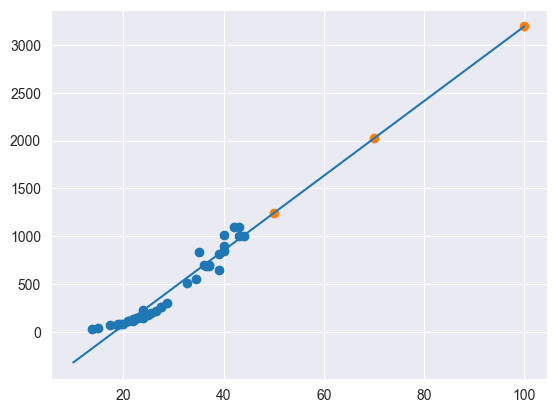

In [81]:
# 시각화
plt.scatter(X_train, y_train)
plt.scatter([[50], [70], [100]], pred)
# 최근접 이웃이라는 개념 없어지고 직선 형태의 예측을 보여준다.
# 실제로 메모리에 올려놓는 개념이 아님

# 학습된 회귀계수, 절편 선그래프
plt.plot([10,100], [10 *lin_reg.coef_ + lin_reg.intercept_, 100 * lin_reg.coef_ +
                    lin_reg.intercept_])
                            # 기울기가 양수다 -> 값도 증가
                            # 기울기가 음수다 -> 값도 감소

plt.show()

In [82]:
# 학습된 회귀계수, 절편
print('w : ', lin_reg.coef_)
print("b : ", lin_reg.intercept_)

# 이 값은 우리가 준게 아니라 모델이 찾은 값
            #(1,) -> (1,1)           (3, 1) 이니까 => 브로드캐스팅 되어서 계산 가능 O
pred = lin_reg.coef_ * [[50], [70], [100]] + lin_reg.intercept_
pred

w :  [39.01714496]
b :  -709.0186449535474


array([[1241.83860323],
       [2022.1815025 ],
       [3192.69585141]])

## 특성 공학 Feature engineering

1. 특성 생성
    - 파생/ 요약변수 생성
    - 다항 특성 생성 : 비선형 데이터를 처리하기 위해서, 기존 변수의 차수를 추가한 변수 생성

2. 특성 변환
3. 차원 축소
4. 중복값 / 결측치 처리

In [83]:
perch_df = pd.read_csv('data/perch_full.csv')

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

perch_df['weight'] = perch_weight
perch_df.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [84]:
# 컬럼 확인
perch_df.columns


Index(['length', ' height', ' width', 'weight'], dtype='object')

In [85]:
# 데이터 준비
X = perch_df[['length', ' height', ' width']].to_numpy()
y = perch_df['weight'].to_numpy()

# 학습/테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42, 3) (42,)
(14, 3) (14,)


In [86]:
# 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # 적절한 회귀계수 3개, 절편을 찾음

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
# 평가 및 예측
print('학습 점수(R^2) : ', lin_reg.score(X_train, y_train))
print('테스트점수(R^2) : ', lin_reg.score(X_test, y_test))

pred = lin_reg.predict([[20, 5, 2.5]])
pred

학습 점수(R^2) :  0.9559326821885706
테스트점수(R^2) :  0.8796419177546367


array([24.66653635])

In [88]:
# 회귀계수, 절편 확인
coef = lin_reg.coef_
intercept = lin_reg.intercept_
coef, intercept

# 직접 계산
input = [20, 5, 2.5]
# y = w1*x1 + w2*x2 + w3*x3 + b
# output = coef[0] * input[0] + coef[1] * input[1] + coef[2] * input[2] + intercept
# 식을 이렇게 늘여뜨려서 하는 게 번거롭다 => 행렬곱셈을 이용해서 계산해줄 수 있다.
output = np.dot(input, coef) + intercept # 행렬 곱셈 / 절편만 더해주면 된다.
output

np.float64(24.66653634793454)

### 다항처리

In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2) #degree=2(기본값)
X = [[2, 3]] # 샘플 1개, 2개의 특성 (x0=2, x1=3)
# - 2개의 특성 (x0=2, x1=3)
# - bias값 1 추가
# - x0의 제곱, x0, x1의 곱, x1의 제곱

# 왜 이렇게 하느냐? -> 모델도 특성을 조금 주는 것보다 특성을 많이 주는 것이 정확도를 더 올릴 수 있기 때문이다.

poly.fit(X)
X_poly = poly.transform(X)
print(poly.get_feature_names_out()) # 6개 특성 내역
# ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']
X_poly



['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


array([[1., 2., 3., 4., 6., 9.]])

In [91]:
# 농어 데이터에 다항처리 적용
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
print(poly.get_feature_names_out())
# - 절편 1
# - 기존 3개의 특성 x0, x1, x2
# - 제곱 3개
# - 각 특성간의 곱


X_train_poly[:3]
# 속성수가 많다는 것은 모델의 정확도를 올릴 수 있다.


(42, 10)
['1' 'x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


array([[  1.    ,  19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,
         59.584 ,  26.4196,  15.6256,   9.2416],
       [  1.    ,  22.    ,   5.88  ,   3.52  , 484.    , 129.36  ,
         77.44  ,  34.5744,  20.6976,  12.3904],
       [  1.    ,  18.7   ,   5.2   ,   3.12  , 349.69  ,  97.24  ,
         58.344 ,  27.04  ,  16.224 ,   9.7344]])

In [92]:
# 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# 평가
print("훈련셋: ", lin_reg.score(X_train_poly, y_train))
print("평가셋: ", lin_reg.score(X_test_poly, y_test))


훈련셋:  0.9903183436982125
평가셋:  0.9714559911594111


In [99]:
# 3차 다항식 적용
poly3 = PolynomialFeatures(degree=4)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

print(X_train_poly3.shape)
print(poly3.get_feature_names_out())

# 모델 생성 및 훈련
lin_reg3 = LinearRegression()
lin_reg3.fit(X_train_poly3, y_train)


# 평가
print("훈련셋 : ", lin_reg3.score(X_train_poly3, y_train))
print("평가셋 : ", lin_reg3.score(X_test_poly3, y_test))

(42, 35)
['1' 'x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4']
훈련셋 :  0.999528689807448
평가셋 :  -6.786696980910867


## 과대적합 | 과소적합


![](https://d.pr/i/4j93wE+)


https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html


**과대적합 (Overfitting)**
- 모델이 훈련 데이터에 너무 맞춰져서 새로운 데이터에 일반화되지 않는 상태.
- 데이터에서는 높은 정확도를 보이지만 테스트 데이터에서는 성능이 떨어짐.
- 데이터의 잡음(noise)까지 학습하여 복잡한 패턴을 모방함.
- 데이터의 각 샘플을 완벽하게 분류하지만, 새로운 데이터에 대해 잘못된 예측을 많이 함.
- 해결 방법:
  - 모델 단순화: 복잡도를 줄여 모델을 간단하게 만듦.
  - 정규화: L1, L2 정규화를 통해 모델의 복잡도를 줄임.
  - 더 많은 데이터: 훈련 데이터를 더 많이 수집하여 모델의 일반화 능력을 향상시킴.
  - 드롭아웃: 신경망의 경우 일부 뉴런을 임의로 제외하여 학습하는 드롭아웃 기법을 사용함.


**과소적합 (Underfitting)**
- 모델이 훈련 데이터와 테스트 데이터 모두에서 제대로 학습하지 못한 상태.
- 훈련 데이터에서도 낮은 정확도를 보임.
- 너무 단순한 모델로 인해 데이터의 패턴을 잡아내지 못함.
- 데이터의 중요한 특징을 무시하여 전반적인 성능이 낮음.
- 해결 방법:
  - 모델 복잡화: 더 복잡한 모델을 사용하거나 더 많은 특성을 추가하여 학습 능력을 높임.
  - 특성 공학: 데이터의 중요한 특징을 잘 반영할 수 있도록 특성을 추가하거나 변환함.
  - 더 긴 학습 시간: 학습 과정을 더 오래 진행하여 모델이 데이터를 더 잘 이해하게 함.


**예시로 설명하기**
- 과대적합 예시:
  - 학생이 시험 공부할 때, 기출문제의 답만 외우고 시험에 나올 다른 문제 유형을 대비하지 않는 것과 비슷합니다. 기출문제에서는 높은 점수를 받지만 새로운 문제에서는 낮은 점수를 받습니다.
  - 그래프로 시각화해보면 훈련 데이터에 정확히 맞는 복잡한 곡선을 그리는 모델. 새로운 데이터에 대해 일반화되지 못함.
- 과소적합 예시:
  - 학생이 시험 공부를 충분히 하지 않아, 기본적인 개념조차 이해하지 못하는 경우입니다. 따라서 기출문제와 시험 모두에서 낮은 점수를 받습니다.
  - 그래프로 시각화해보면 단순한 직선이나 곡선을 그리는 모델. 데이터의 패턴을 잘 잡아내지 못함.


### 실습문제 : 다항식 적용하기

(42, 1) (42,)
(14, 1) (14,)
(42, 2)
(14, 2)
['x0' 'x0^2']
x :  [[10.        ]
 [11.83673469]
 [13.67346939]]
x_poly :  [[ 10.         100.        ]
 [ 11.83673469 140.10828821]
 [ 13.67346939 186.9637651 ]]
y_pred:  [ 1.90417193  2.99110778 10.92193375]


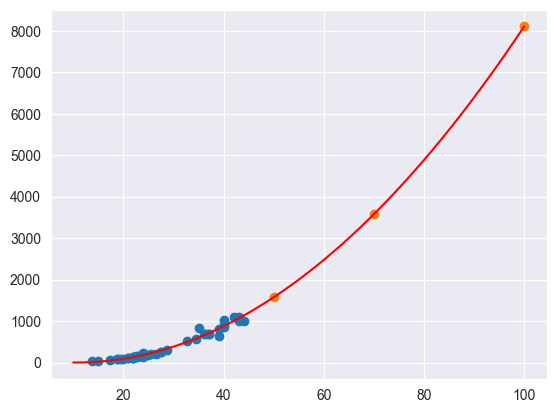

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)



# 모델 학습을 위한 2차원 변경
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



#다항식 적용
poly = PolynomialFeatures(degree=2, include_bias=False) # 절편 빼는 거. 여기선 1을 뺌
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
print(X_test_poly.shape)
print(poly.get_feature_names_out())
X_train_poly

# 모델 학습
lin_reg = LinearRegression() # 최적의 기울기(계수)와 절편을 찾는 모델
lin_reg.fit(X_train_poly, y_train) # 적절한 회귀계수(기울기), 절편을 찾음


# 예측
input = [[50], [70], [100]]
input_poly = poly.transform(input)
pred = lin_reg.predict(input_poly)
pred

#array([1573.98423528, 3577.22279821, 8103.57880667])
# 더 좋아진 것을 확인

#2차 회귀선 시각화
plt.scatter(X_train, y_train)
plt.scatter(input, pred)
# 직선이 아니라 곡선으로 그려진 것을 볼 수 있음


# 학습된 회귀계수, 절편 선그래프
# linspace: start부터 end까지 50개의 숫자를 균일한 간격으로 반환
x = np.linspace(10, 100, 50).reshape(-1, 1) # 2차원으로 바뀜
print('x : ',  x[:3])


x_poly = poly.fit_transform(x)
print('x_poly : ', x_poly[:3])
y_pred = lin_reg.predict(x_poly)
print('y_pred: ', y_pred[:3])

plt.plot(x, y_pred, color='red')
plt.show()

